In [329]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [330]:
pd.set_option('display.max_rows', None)

In [331]:
df.head()

,MatchID,Date,Hero,Match Duration,Result,Kills,Deaths,Assists,Networth,Team,Enemy_pos1,Enemy_pos2,Enemy_pos3,Enemy_pos4,Enemy_pos5,Ally_pos1,Ally_pos2,Ally_pos3,Ally_pos4
0,7.343242e+09,9/19/2023 23:29,rubick,36:41:00,Lost,9.0,9.0,12.0,11200.0,Radiant,bloodseeker,primal_beast,centaur,spirit_breaker,venomancer,skeleton_king,invoker,legion_commander,earthshaker
1,7.341850e+09,9/19/2023 0:11,warlock,55:00:00,Lost,2.0,9.0,17.0,16400.0,Radiant,monkey_king,obsidian_destroyer,axe,jakiro,skywrath_mage,luna,invoker,kunkka,ancient_apparition
2,7.333781e+09,9/13/2023 22:15,rubick,47:42:00,Lost,1.0,9.0,21.0,11400.0,Dire,nevermore,obsidian_destroyer,axe,vengefulspirit,snapfire,sven,invoker,centaur,witch_doctor
3,7.333761e+09,9/13/2023 21:16,rubick,30:02:00,Lost,1.0,8.0,9.0,8000.0,Dire,juggernaut,sand_king,dawnbreaker,skywrath_mage,vengefulspirit,phantom_assassin,lone_druid,legion_commander,abaddon
4,7.325788e+09,9/8/2023 17:12,jakiro,42:19:00,Lost,6.0,8.0,16.0,15500.0,Dire,drow_ranger,razor,slardar,treant,warlock,muerta,lone_druid,spirit_breaker,silencer


In [332]:
df = pd.read_csv(r"C:\Users\henry\OneDrive - Louisiana State University\Dota2Predictor\dota.csv")

In [333]:
df.dropna(inplace=True)

# Use Binary Logistic Regression to predict Win Probability

## Win Probability vs. Number of Deaths

In [334]:
X = df['Deaths']

In [335]:
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

Text(0, 0.5, 'Result')

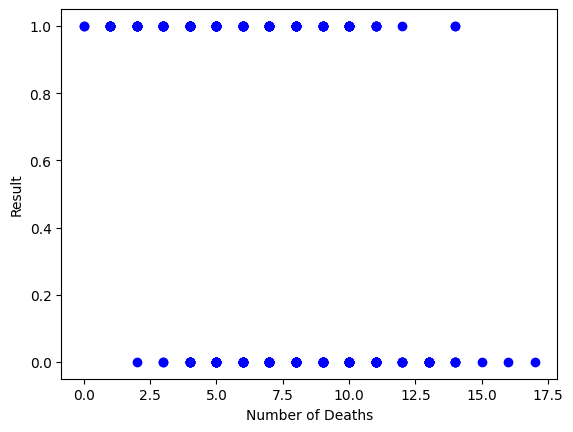

In [336]:
plt.scatter(df.Deaths, y.Result, marker = 'o', color = 'b')

plt.xlabel('Number of Deaths')
plt.ylabel('Result')

In [337]:
X_train, X_test, y_train, y_test = train_test_split(df[['Deaths']], y, train_size=0.9)

In [338]:
model = LogisticRegression()

In [339]:
model.fit(X_train, y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [340]:
ypred = model.predict(X_test)

### Check Accuracy

In [341]:
model.score(X_test,y_test)

0.6896551724137931

In [342]:
X_predict = np.arange(1,18)

In [343]:
probabilities = model.predict_proba(X_predict.reshape(-1, 1))

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [344]:
type(probabilities[:,1])

numpy.ndarray

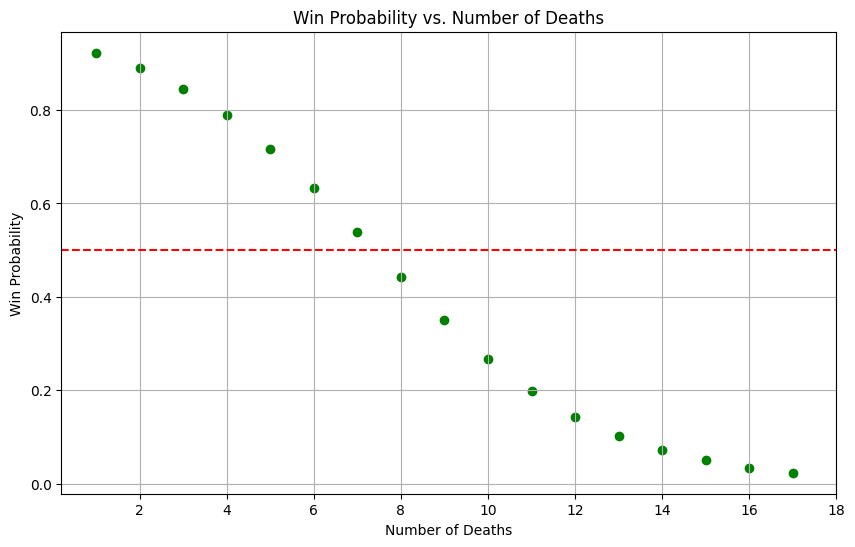

In [345]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')


x_ticks = list(range(2,20,2))

plt.xticks(x_ticks)
plt.xlabel('Number of Deaths')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Number of Deaths")

plt.axhline(y=0.5, color='red', linestyle = '--')

plt.grid(True)
plt.show()

## Win Probability vs. Networth


In [346]:
X = df['Networth']

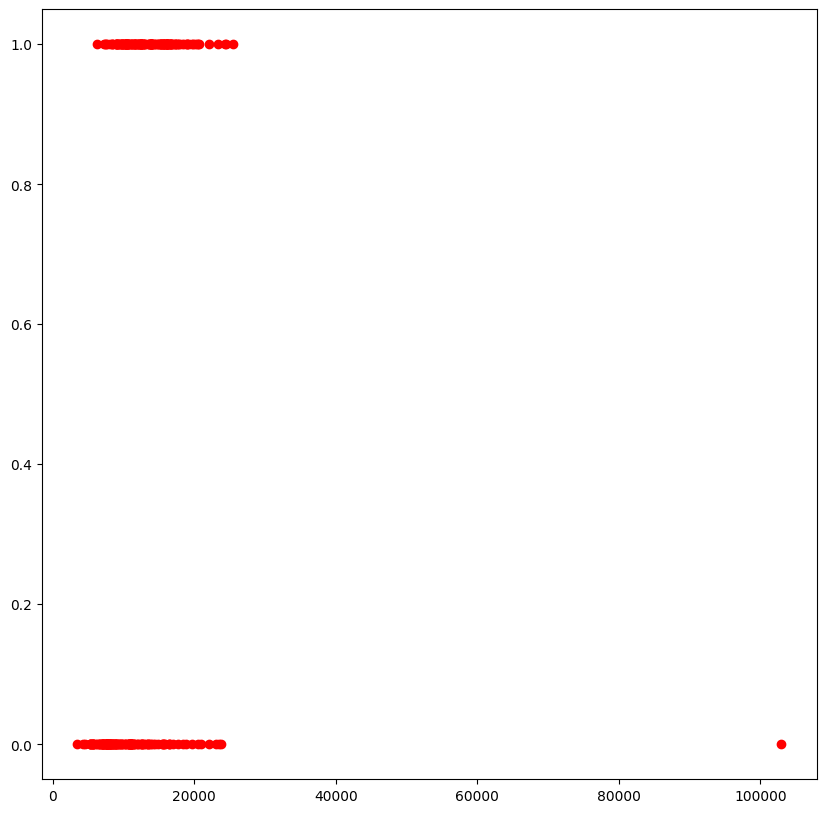

In [347]:
plt.figure(figsize = (10,10))

plt.scatter(X, y, marker = 'o', color = 'red')

#### Remove Outlier - Was a match I disconnected

In [348]:
sorted(df['Networth'].values, reverse= True)

[103000.0,
 25500.0,
 24500.0,
 24300.0,
 23700.0,
 23484.0,
 23300.0,
 23100.0,
 22100.0,
 22100.0,
 20900.0,
 20600.0,
 20500.0,
 20500.0,
 20400.0,
 20100.0,
 19778.0,
 19700.0,
 19700.0,
 19300.0,
 18900.0,
 18900.0,
 18900.0,
 18800.0,
 18600.0,
 18400.0,
 18200.0,
 17800.0,
 17800.0,
 17700.0,
 17600.0,
 17600.0,
 17300.0,
 17200.0,
 17200.0,
 17000.0,
 16900.0,
 16900.0,
 16800.0,
 16700.0,
 16600.0,
 16600.0,
 16600.0,
 16500.0,
 16500.0,
 16400.0,
 16383.0,
 16369.0,
 16300.0,
 16200.0,
 16100.0,
 16100.0,
 16100.0,
 16100.0,
 16100.0,
 16100.0,
 16000.0,
 16000.0,
 15900.0,
 15800.0,
 15700.0,
 15700.0,
 15700.0,
 15700.0,
 15700.0,
 15600.0,
 15600.0,
 15600.0,
 15500.0,
 15500.0,
 15400.0,
 15300.0,
 15300.0,
 15300.0,
 15300.0,
 15300.0,
 15200.0,
 15000.0,
 14800.0,
 14800.0,
 14800.0,
 14600.0,
 14500.0,
 14500.0,
 14300.0,
 14200.0,
 14100.0,
 14000.0,
 14000.0,
 14000.0,
 13900.0,
 13900.0,
 13900.0,
 13800.0,
 13800.0,
 13800.0,
 13800.0,
 13700.0,
 13700.0,
 13700.0,

In [349]:
df[df['Networth'] >= 100000]

,MatchID,Date,Hero,Match Duration,Result,Kills,Deaths,Assists,Networth,Team,Enemy_pos1,Enemy_pos2,Enemy_pos3,Enemy_pos4,Enemy_pos5,Ally_pos1,Ally_pos2,Ally_pos3,Ally_pos4
193,7.056366e+09,3/11/2023 22:34,lion,40:48:00,Lost,2.0,13.0,5.0,103000.0,Radiant,ursa,witch_doctor,legion_commander,nyx_assassin,hoodwink,juggernaut,storm_spirit,mars,ancient_apparition


In [350]:
df.drop(193, inplace=True)

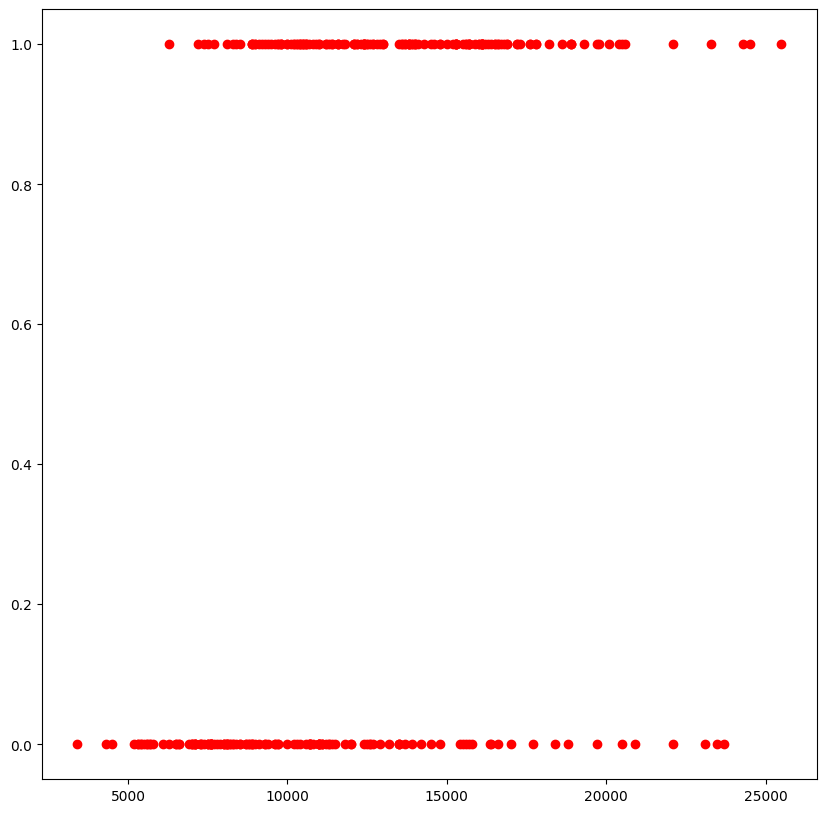

In [351]:
X = df['Networth']
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

plt.figure(figsize = (10,10))

plt.scatter(X, y, marker = 'o', color = 'red')

In [352]:
X_train, X_test, y_train, y_test = train_test_split(df[['Networth']], y, train_size=0.9)

In [353]:
model.fit(X_train, y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [354]:
ypred = model.predict(X_test)

In [355]:
model.score(X_test,y_test)

0.41379310344827586

In [356]:
X_predict = np.arange(1,25000, 1000)

In [357]:
probabilities = model.predict_proba(X_predict.reshape(-1, 1))

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


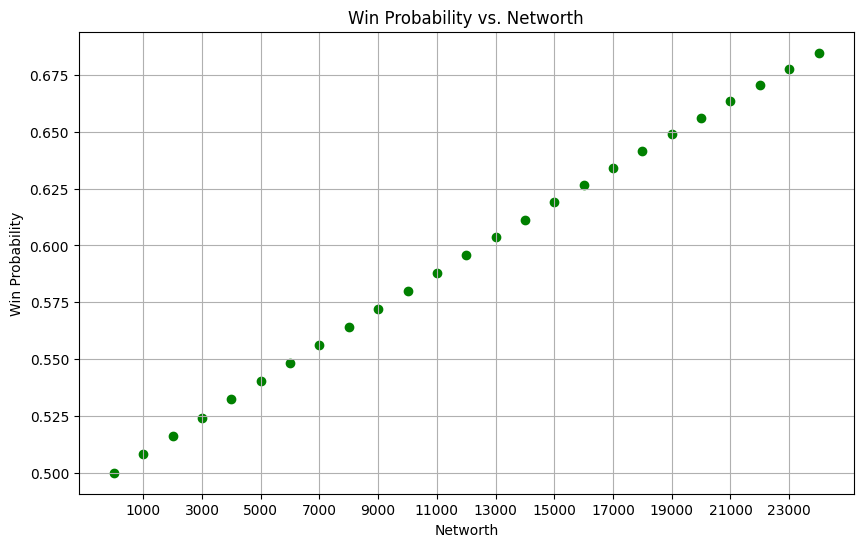

In [358]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')

x_ticks = list(range(1000,25000,2000))

plt.xticks(x_ticks)
plt.xlabel('Networth')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Networth")

plt.grid(True)
plt.show()

## Win Probability vs. Assists

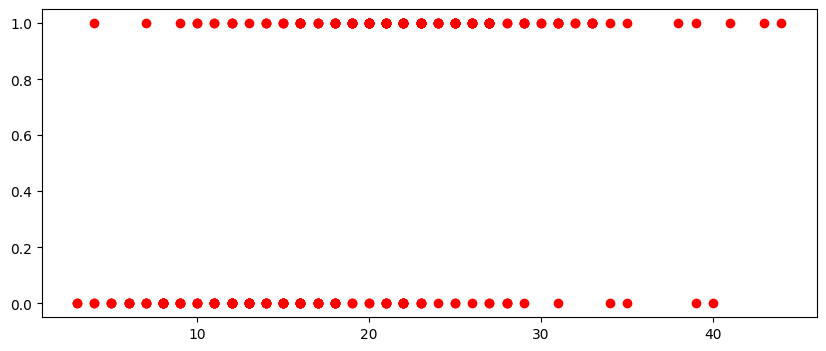

In [361]:
X = df['Assists']
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

plt.figure(figsize = (10,4))

plt.scatter(X, y, marker = 'o', color = 'red')